<a href="https://colab.research.google.com/github/soundarzozm/MNIST-Keras-model/blob/master/mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries and functions.

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

Using TensorFlow backend.


Getting *'train'* and *'test*' data from the **MNIST** dataset provided by **Keras**.

In [3]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Checking the *shapes* of our raw data.
Notice that all the pictures in the dataset have the same 
**Dimensions: 28x28 px**

In [4]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test_orig.shape)
print(y_test_orig.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Displaying a random example *(index: 1298 here)* from the training data.

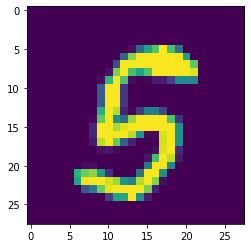

In [5]:
plt.imshow(X_train_orig[1298])

We know that the MNIST dataset is **greyscale** in nature.
Hence we **reshape** the *train* and *test* data with a **fourth dimension** as **1** which refers to the *number of channels*.

In [0]:
X_train = X_train_orig.reshape(60000,28,28,1)
X_test = X_test_orig.reshape(10000,28,28,1)

Since this MNIST dataset consists of *10 different categories of output* i.e. 0-9 digits, we must convert the output data format to **One Hot Encoding** since we'll be using the **softmax activation** to categorise the outputs.

In [0]:
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

Printing a **random value** of *y_train* to show how One Hot Encoding works.

In [8]:
print(y_train_orig[1])
print(y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Here we can see that the **number 0** has been *converted* to a **10-sized array **which **has 1** at the **0th** index and **0s at all other indices**.
This is **One Hot Encoding**.

Let's start a **Sequential model** (from Keras library) since it is *less time consuming to implement.*

In Sequential models we basically *keep adding layers to the model sequentially*.

In [0]:
model = Sequential()

Our model's **architecture** is as follows:

1) A **convolutional layer** with 64 filters of size 3x3 and **activation 'relu'**. Padding and stride are set to their reset values since we haven't explicitly mentioned their values.
We **explicitly mention the input_shape here** since it is the **initial layer** of the model and hence has to **initailize the model for the respective picture.**

*(For details about the default values of parameters check Keras documentaion.)*

2) A **convolutional layer** with 32 filters of size 3x3 and **activation 'relu'**.

3) Here we **flatten** the volume to a vector since we are going to work with a **Fully Connected layer** next.

4) The** output layer** with **10 output units** and **activation 'softmax'** since we are going to **categorise** here.



In [0]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

We **complie** the model i.e. define certain important parameters of the model such as -* optimizer, loss function, and the metrics* we are interested in. 

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Now we **fit** the model to the *training set* i.e. **train** the model on the training set.

Notice that we are also providing the model with **validation_data** on which the **model's accuracy is tested** along with the training of the model.

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=512)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 146s 2ms/step - loss: 1.5232 - accuracy: 0.8741 - val_loss: 0.0928 - val_accuracy: 0.9706
Epoch 2/2
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0777 - val_accuracy: 0.9767


Now that our model is trained, let's **evaluate** the model on **unseen data** and check the accuracy and loss.

In [13]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 639us/step


[0.07774508394915611, 0.9767000079154968]

We can see that out model has an accuracy of 97.8% roughly, which is pretty good.

Let's carry on and get the predictions of the model on our test data.

In [0]:
pred = model.predict(X_test)

We now obtained the predicted values of our model on the test data.

But we must remember that we trained the model with **One Hot Encoded** values of outputs since it is a categroical prediction using softmax activation.
Hence, the *predicted values are in One Hot Encoded format* as well.

In [15]:
print(pred[287])

[9.0316834e-12 1.2352007e-11 1.3716477e-09 6.1510548e-08 9.9999630e-01
 1.3648931e-06 2.5057427e-11 9.5235606e-08 4.6682811e-07 1.6528853e-06]


Hence we take the greatest value from the vector as 1 and assign 0 to all other indices to convert the output back to One Hot Encoding.

Here we've taken a list 'result' to store the predicted values of all 10,000 units of our test data. 

In [0]:
result = []

for i in range(pred.shape[0]):
  max1=0.0
  pos=0
  for j in range(pred.shape[1]):
    if pred[i][j] > max1:
      max1 = pred[i][j]
      pos = j
  result.append(pos)    

In [19]:
print(result[:20])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


For an example, let's take a random picture from the test data and print its respective prediction by our model and check if they match.

9


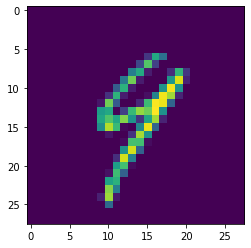

In [20]:
print(result[4369])
plt.imshow(X_test_orig[4369])

We have successfully constructed and implemented a simple Convolutional Neural Network on the MNIST dataset and achieved 97.8% accuracy. 